Validating Bertrand's Postulate up to 500
generate_primes_up_to: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
Result: True

Validating Cramér's Conjecture up to 500
generate_primes_up_to: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 

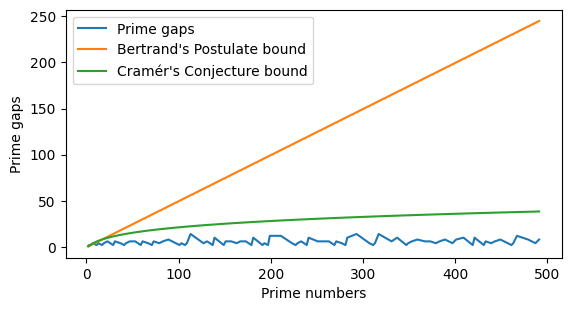

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def generate_primes_up_to(n):
    primes = [i for i in range(2, n+1) if is_prime(i)]
    print(f'generate_primes_up_to: {primes}')
    return primes

def prime_gaps(primes):
    gaps = [primes[i+1] - primes[i] for i in range(len(primes) - 1)]
    print(f'prime_gaps {gaps}')
    return gaps

def validate_bertrands_postulate(n):
    primes = generate_primes_up_to(2 * n)

    for i in range(2, n + 1):
        prime_exists = False
        for p in primes:
            if i < p < 2 * i:
                prime_exists = True
                break
        if not prime_exists:
            return False
    return True

def validate_cramers_conjecture(n):
    primes = generate_primes_up_to(n)
    gaps = prime_gaps(primes)
    
    for i in range(len(gaps)):
        if gaps[i] > (np.log(primes[i]))**2:
            return False
    return True


n = 500

print("Validating Bertrand's Postulate up to", n)
print("Result:", validate_bertrands_postulate(n))

print("\nValidating Cramér's Conjecture up to", n)
primes = generate_primes_up_to(n)
print("generate_primes_up_to:", primes)
result = validate_cramers_conjecture(n)
print("Result:", result)

# Plot the prime gaps and conjecture bounds
primes = generate_primes_up_to(n)
gaps = prime_gaps(primes)
plt.plot(primes[:-1], gaps, label='Prime gaps')
plt.plot(primes[:-1], [p // 2 for p in primes[:-1]], label="Bertrand's Postulate bound")
plt.plot(primes[:-1], [(np.log(p))**2 for p in primes[:-1]], label="Cramér's Conjecture bound")
plt.xlabel('Prime numbers')
plt.ylabel('Prime gaps')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [2]:
from collections import defaultdict
import numpy as np
in_between = defaultdict(list)
buffer = []
n=5000
for i in range(0, n):
  if is_prime(i):
    in_between[len(buffer)].append(np.array(buffer))
    buffer = []
    continue
  buffer.append(i)
  
  


In [3]:
print(f'max: {max(in_between.keys())}\n min: {min(in_between.keys())}')

max: 33
 min: 0


In [4]:
from collections import defaultdict
import numpy as np

def is_prime_miller_rabin(n, k=5):
    if n <= 1:
        return False
    if n <= 3:
        return True

    # Find d such that n - 1 = 2^r * d
    d = n - 1
    r = 0
    while d % 2 == 0:
        d //= 2
        r += 1

    # Miller-Rabin test
    for _ in range(k):
        a = np.random.randint(2, n - 1)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def prime_gen():
    yield 2
    n = 3
    while True:
        if is_prime_miller_rabin(n):
            yield n
        n += 2

in_between = defaultdict(list)
buffer = []
n = 500000

primes = prime_gen()
next_prime = next(primes)

for i in range(0, n):
    if i == next_prime:
        in_between[len(buffer)].append(np.array(buffer))
        buffer = []
        next_prime = next(primes)
    else:
        buffer.append(i)


In [5]:
print(f'max: {max(in_between.keys())}\n min: {min(in_between.keys())}')

max: 113
 min: 0


(692, 2)


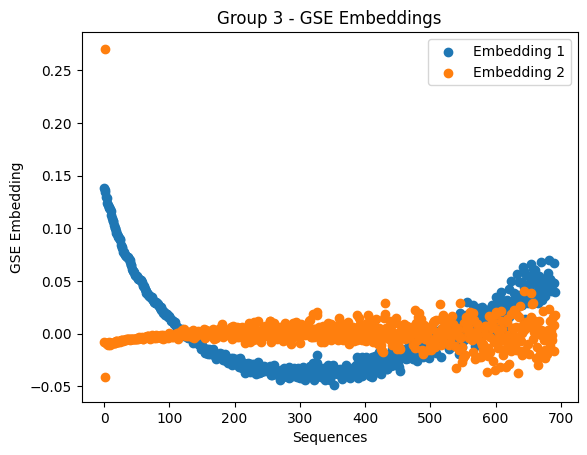

(1098, 2)


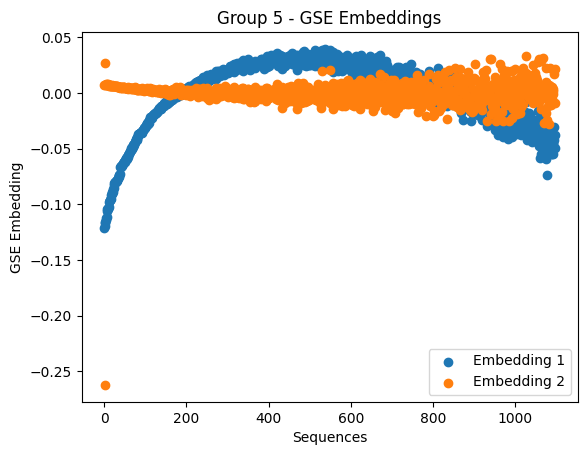

(417, 2)


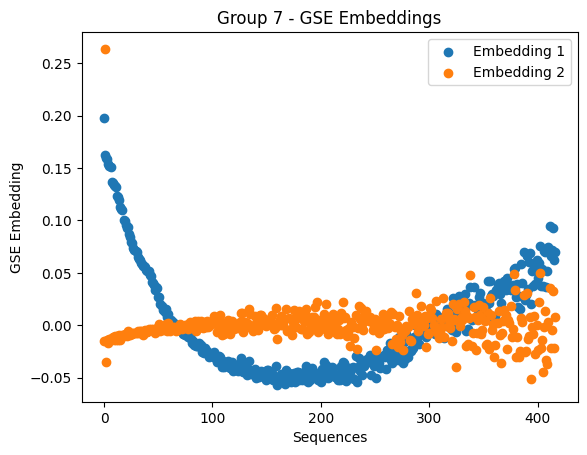

(244, 2)


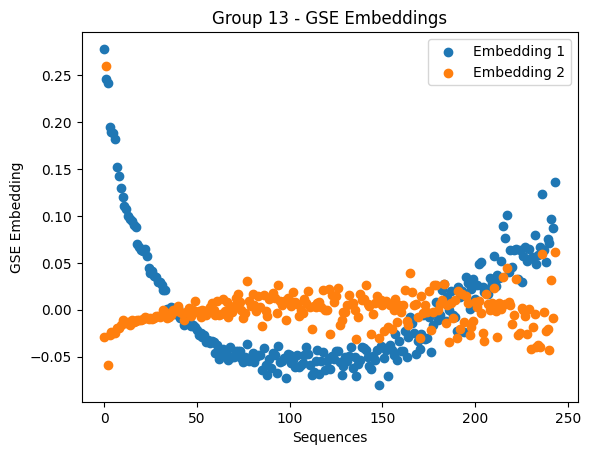

(489, 2)


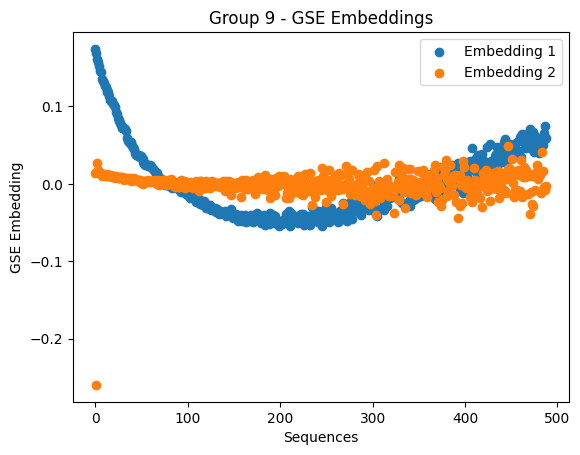

(534, 2)


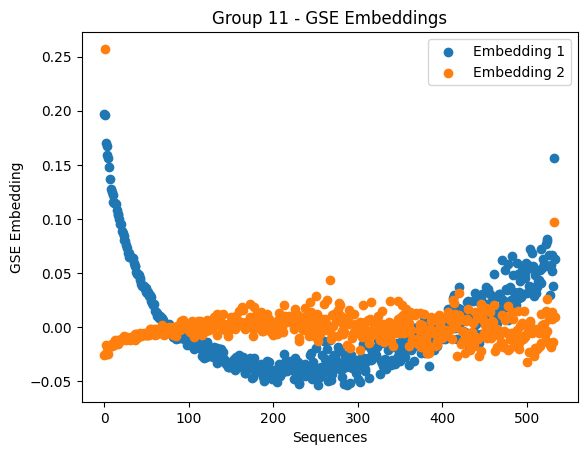

(261, 2)


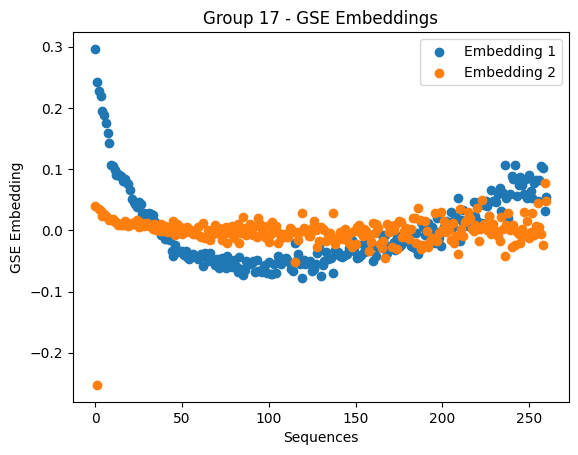

(106, 2)


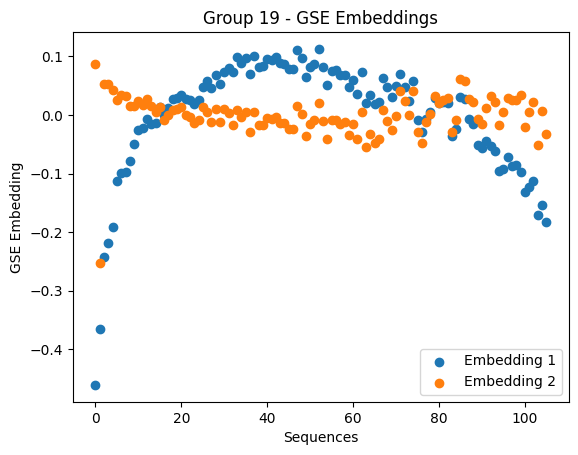

(103, 2)


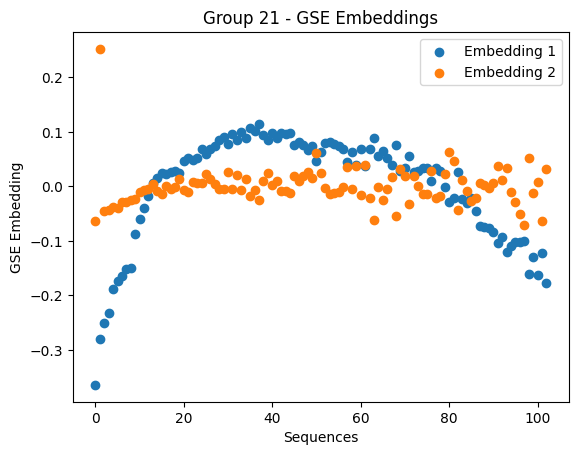

(16, 2)


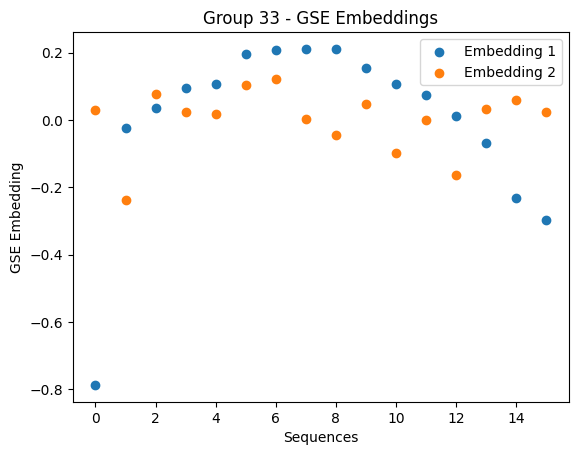

(83, 2)


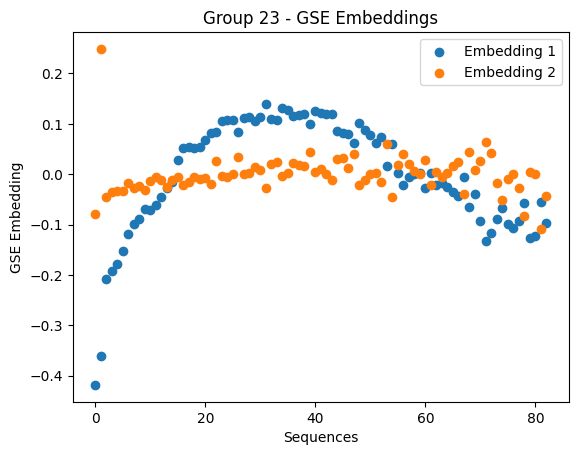

(175, 2)


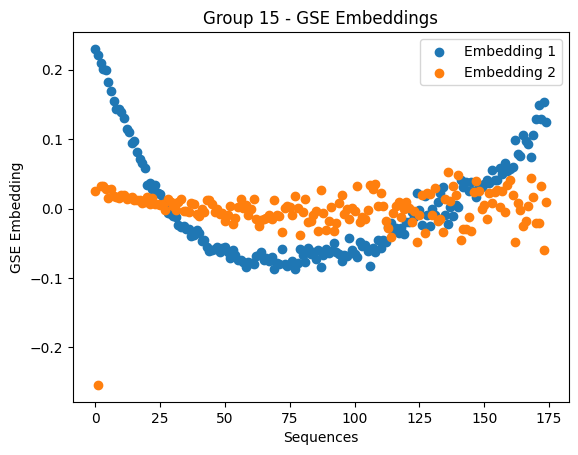

(35, 2)


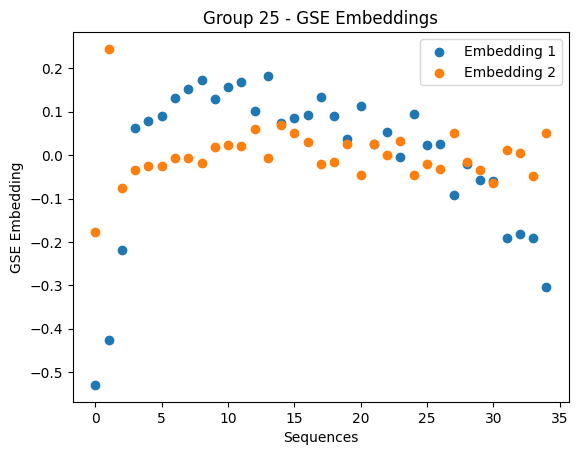

(39, 2)


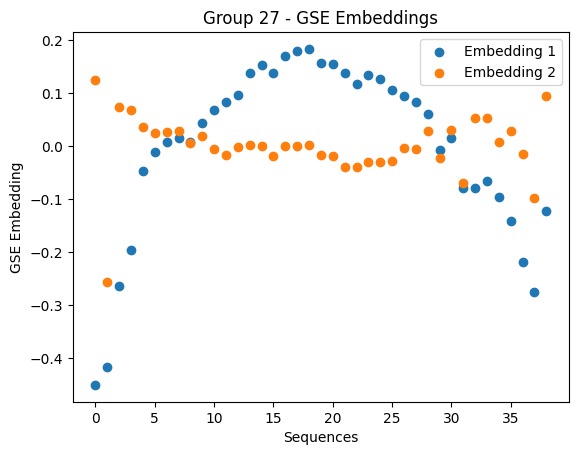

(66, 2)


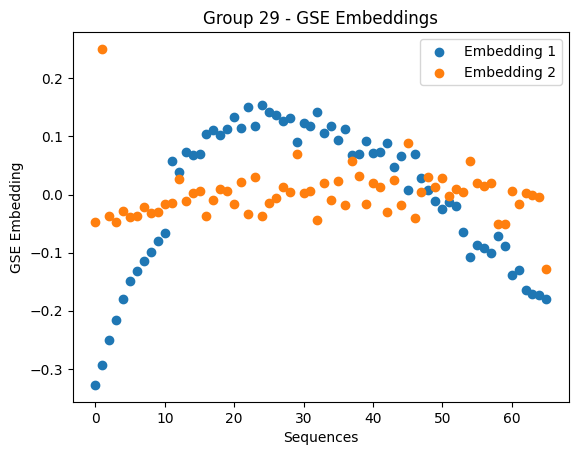

(12, 2)


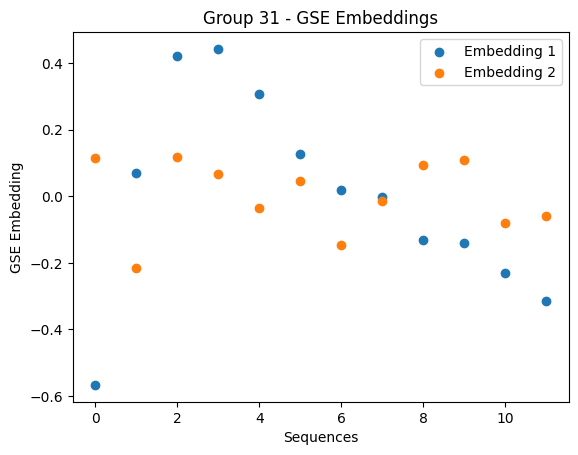

(20, 2)


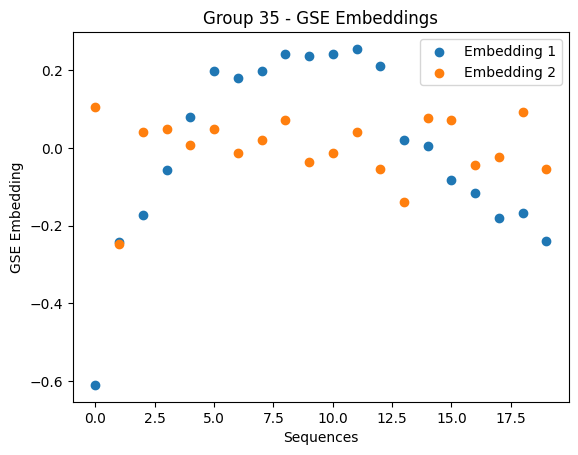

(3, 2)


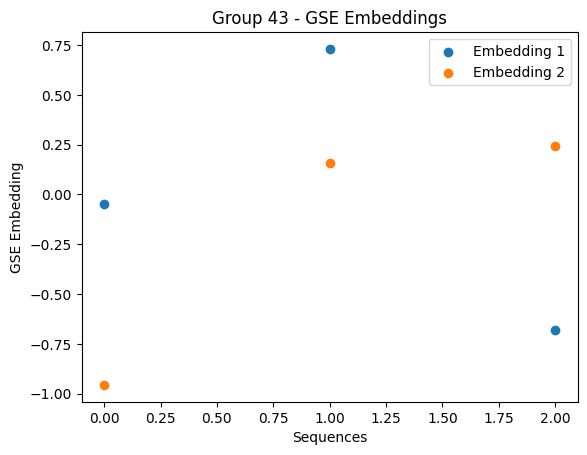

(5, 2)


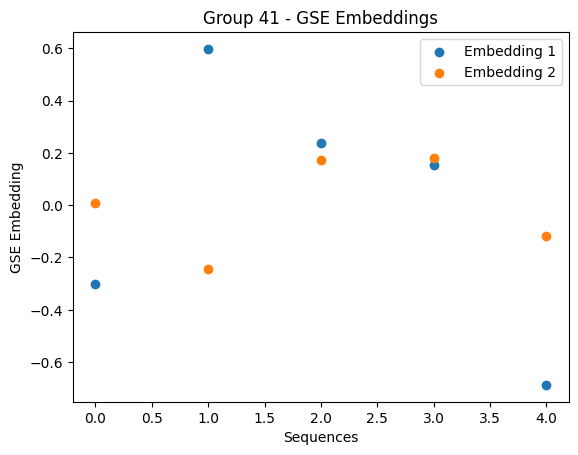

(8, 2)


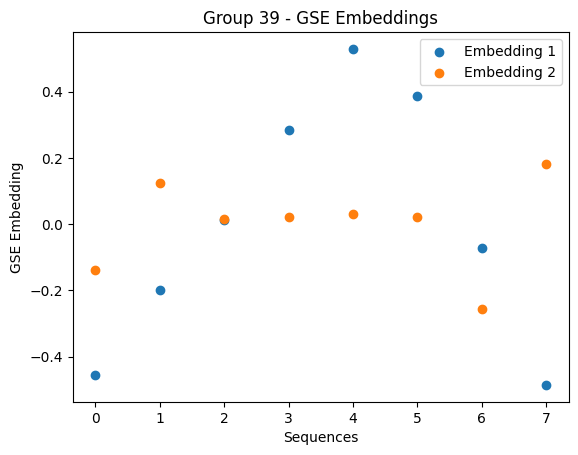

(5, 2)


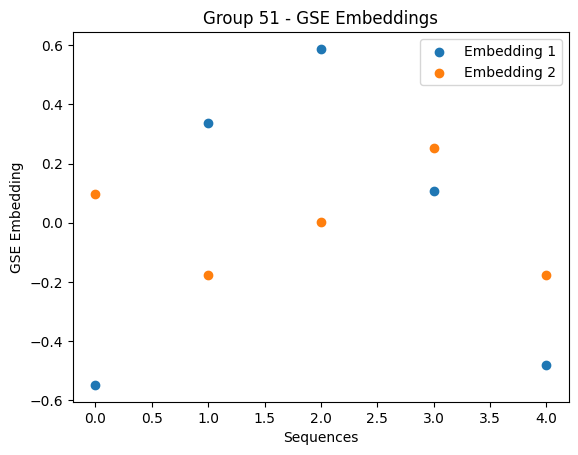

(1, 1)


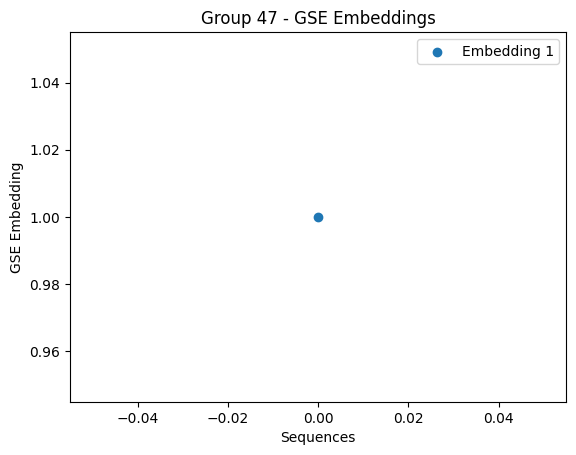

(5, 2)


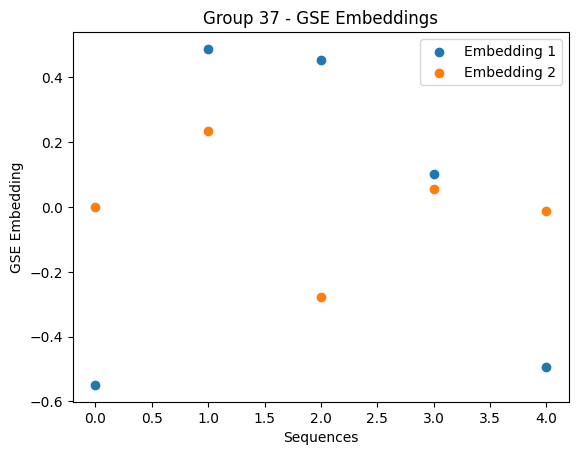

(1, 1)


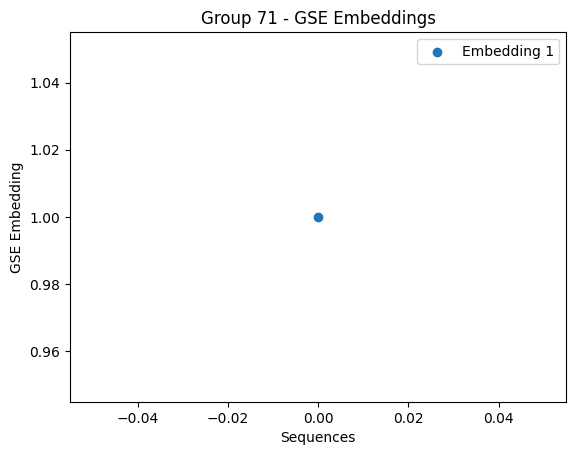

(2, 2)


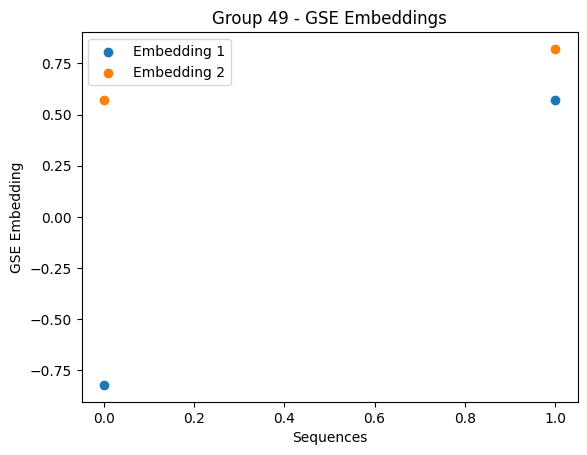

(1, 1)


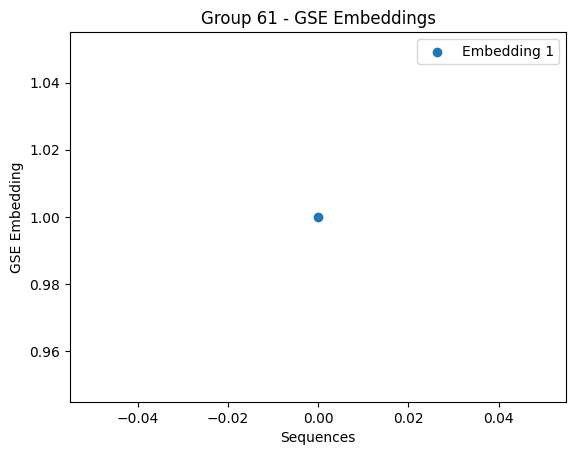

(3, 2)


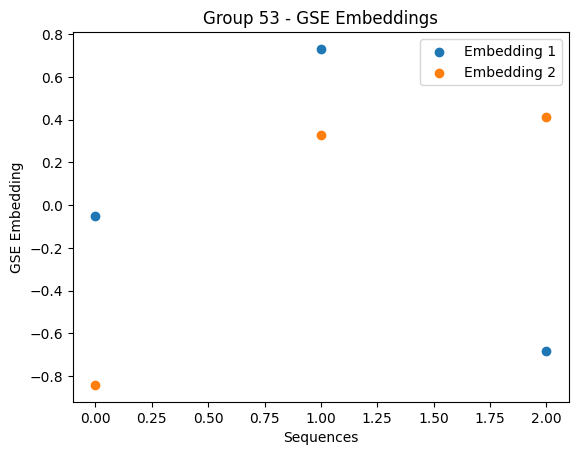

(1, 1)


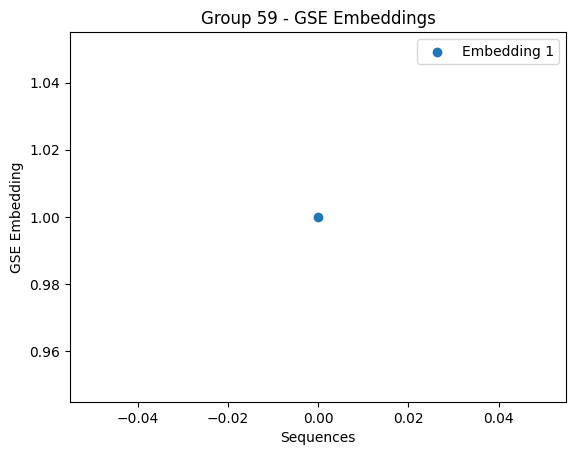

(1, 1)


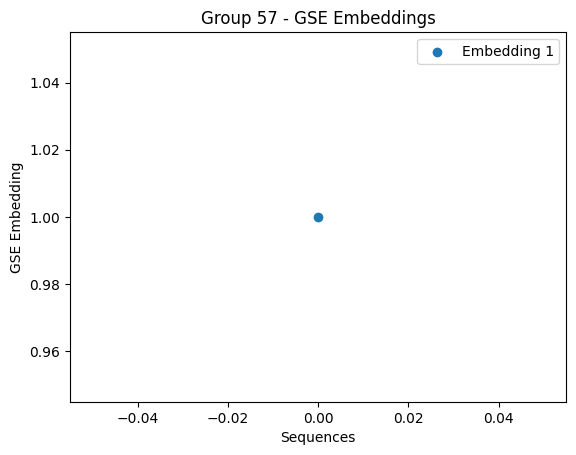

In [14]:
from matplotlib.scale import LogisticTransform
from typing import Tuple
from numpy.linalg import svd
from scipy.linalg import solve_sylvester
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt

def plot_log_singular_values(singular_values, title=None):
    sorted_singular_values = np.sort(singular_values)[::-1]  # Sort singular values in descending order
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sorted_singular_values) + 1), np.log(sorted_singular_values))
    plt.xlabel('Index')
    plt.ylabel('Log Singular Value')
    if title:
        plt.title(title)
    plt.show()



def graph_sylvester_embedding(G: Tuple, m: int, ts: np.ndarray) -> np.ndarray:
        """
        Compute the spectral kernel descriptor or the Spectral Graph Wavelet descriptor.

        Args:
            G (Tuple): A tuple containing the graph's vertices (V) and weights (W).
            m (int): The number of singular values to consider.
            ts (np.ndarray): The spectral scales.

        Returns:
            np.ndarray: The node_embeddings matrix.
        """
        V, W = G
        n = len(V)
        D_BE = np.diag(W.sum(axis=1))
        L_BE = np.identity(n) - np.dot(
            np.diag(1 / np.sqrt(D_BE.diagonal())),
            np.dot(W, np.diag(1 / np.sqrt(D_BE.diagonal()))),
        )

        A = W
        B = L_BE
        C = np.identity(n)
        X = solve_sylvester(A, B, C)

        U, S, _ = svd(X, full_matrices=False)
        #print(S)
        U_m = U[:, :m]
        S_m = S[:m]

        node_embeddings = np.zeros((n, m))

        for i in range(n):
            for s in range(m):
                # Spectral kernel descriptor
                node_embeddings[i, s] = np.exp(-ts[s] * S_m[s]) * U_m[i, s]

        return node_embeddings

def gen_gse_embeddings(
    A: np.ndarray, embeddings: np.ndarray, m: int = 2
) -> np.ndarray:
    """
    Generate Graph Sylvester Embeddings.

    Args:
        A (np.ndarray): The adjacency matrix of the graph.
        embeddings (np.ndarray): The original node embeddings.
        m (int, optional): The number of spectral scales. Defaults to 7.

    Returns:
        np.ndarray: The generated Graph Sylvester Embeddings.
    """
    V = list(range(len(embeddings)))
    W = A

    G = (V, W)
    ts = np.linspace(0, 1, m)  # equally spaced scales
    m = min(m, min(embeddings.shape))
    gse_embeddings = graph_sylvester_embedding(G, m, ts)
    return gse_embeddings
from collections import defaultdict
import numpy as np
in_between = defaultdict(list)
buffer = []
n=50000
for i in range(0, n):
  if is_prime(i):
    in_between[len(buffer)].append(np.array(buffer))
    buffer = []
    continue
  buffer.append(i)

# Set the number of singular values
m = 2
from concurrent.futures import ProcessPoolExecutor
from sklearn.metrics.pairwise import euclidean_distances

def rbf_kernel_matrix(X, gamma):
    pairwise_distances = euclidean_distances(X)
    return np.exp(-gamma * pairwise_distances**2)

def process_group(length, group):
    if length <= 2 or len(group) == 0:
        return length, None

    group_matrix = np.vstack([sequence for sequence in group])
    kernel = np.matmul(group_matrix, group_matrix.T)
    #kernel = rbf_kernel_matrix(group_matrix, 0.7)
    gse_emb = gen_gse_embeddings(kernel, group_matrix)
    
    return length, gse_emb

def plot_gse_embeddings(length, gse_emb):
    plt.figure()
    for i in range(gse_emb.shape[1]):
        plt.scatter(range(gse_emb.shape[0]), gse_emb[:, i], label=f'Embedding {i + 1}')
    plt.xlabel('Sequences')
    plt.ylabel('GSE Embedding')
    plt.title(f'Group {length} - GSE Embeddings')
    plt.legend()
    plt.show()

with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_group, in_between.keys(), in_between.values()))

gse_embs = defaultdict(list)
for length, gse_emb in results:
    if length <= 2:
        continue
    print(gse_emb.shape)
    plot_gse_embeddings(length, gse_emb)
    dim = gse_emb.shape[1]
    gse_embs[dim].append(gse_emb)


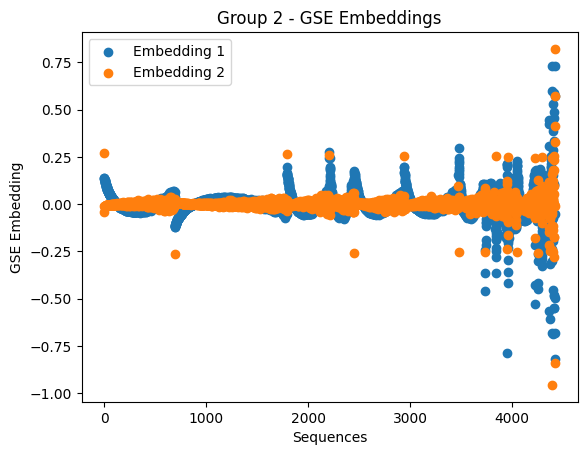

In [15]:

_embs =np.vstack([sequence for sequence in gse_embs[2]])
_kernel = np.matmul(_embs, _embs.T)
plt.figure()
for i in range(_embs.shape[1]):
    plt.scatter(range(_embs.shape[0]), _embs[:, i], label=f'Embedding {i + 1}')
plt.xlabel('Sequences')
plt.ylabel('GSE Embedding')
plt.title(f'Group {2} - GSE Embeddings')
plt.legend()
plt.show()

In [16]:
print(_kernel.shape)

(4421, 4421)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kernel_heatmap(kernel, title=None):
    plt.figure(figsize=(10, 8))
    sns.heatmap(kernel, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
    if title:
        plt.title(title)
    plt.show()
plot_kernel_heatmap(_kernel, title="Kernel Heatmap")
